# Лабораторная работа 6
# Функции в Python. Инструменты функционального программирования

# Задание 6

Проработайте материал четырех лекций, представленный в файлах
- 2022_KM2_T4_Functions.html,
- 2022_KM2_T5_IterableObjects.html,
- 2022_KM2_T6_FunctionalProgramming.html

Перенесите в свой блокнот Jupyter Notebook информационную структуру лекций, с указанием номера и темы раздела.

Дополните каждый пример из лекционного материала кратким комментарием к нему.

## Реализация задания 6

# Тема 4. Функция. Область видимости переменной

## 4.1 Определение функции, вызов функции, объект функции

### Определение функции

In [5]:
def f(x):
    return x

def g(x):
    x = 10

f(1), g(1)

# посредством оператора return посылается результат вызова функции: объект-значение
# если оператор return отсутствует в теле функции, результатом вызова является объект None\

(1, None)

In [7]:
def f(x):
    return x
    x = "new value"

def g(x):
    x = 10
    print("last line of the function body")

f(1), g(1)

# выход из тела функции осуществляется сразу после выполнения оператора return
# если же оператор return в теле функции отсутствует, то выод из тела функции осуществится при достижении конца тела функции и
# вернется объект None

last line of the function body


(1, None)

In [8]:
def f(x):
    return "Return value:", x

f(1)

# если нужно вернуть несколько объектов-значений, их можно возвращать как элементы кортежа

('Return value:', 1)

In [9]:
print(1, 2, 3, sep=' between ')

# пример вызова функции с позиционными и ключевыми аргументами
# позиционные указываются вначале, после уже идут ключевые
# позиционные передаются в строгом виде - таком же, котором и были определены в заголовке функции

1 between 2 between 3


### Вызов функции

In [10]:
def f(arg1, arg2):
    print(arg1, arg2)

f(1, 2)                   # все аргументы позиционные
f(arg1=2, arg2={1})       # все аргументы ключевые
f(arg2='second', arg1='first') # порядок ключевых аргументов не важен
f(3, arg2=4)              # сначала позиционный аргумент, затем ключевой

# в лекционных комментариях все очень хорошо описано, добавить нечего

1 2
2 {1}
first second
3 4


In [12]:
# некорректные вызовы
# f()                       должно быть два аргумента
# f(arg1=2, {1})            позиционный аргумент должен указываться до ключевого аргумента
# f('second', arg1='first') одному позиционному аргументу соответствуют два значения
# f(3, arg3=4)              неизвестный ключевой аргумент

### Определение функции со значениями по умолчанию для аргументов

In [13]:
def f(arg1, arg2=2, arg3=3, arg4=4, arg5=5):
    return arg1, arg2, arg3, arg4, arg5

f(100), f(100, 0)

# пример вызова функции со значениями по умолчанию или 
# стандартными значениями
# аргументы, имеющие стандартные значения являются не обязательными и при отсутствии в выове функции заменяются

((100, 2, 3, 4, 5), (100, 0, 3, 4, 5))

In [14]:
def f(arg1, arg2=2, arg3=3, arg4=4, arg5=5):
    print(arg1, arg2, arg3, arg4, arg5)

f(100)
f(100, 0)

# еще один пример с стандартными значениями
# отмечу, что стандартные значения идут не вначале, а после указания обычных аргументов

100 2 3 4 5
100 0 3 4 5


### Определение функции с произвольным количеством аргументов

In [58]:
def f(*pargs):
    print(pargs)

f(1,2,3)
f(1,2,3,4,5,6)

# указание символа * перед именем аргумента позволяет передавть произвольное количество позиционных аргументов в функцию
# в теле функции все аргументы доступны как элементы кортежа (имя аргумента)

(1, 2, 3)
(1, 2, 3, 4, 5, 6)


In [16]:
def adder(*pargs):
    """ применяет операцию сложения ко всем аргументам и возвращает результат операции"""
    s = pargs[0] 
    for i in pargs[1:]:
        s += i 
    return(s)

adder(1,2,3,4,5,6), adder('word1', 'word2', 'word3'), adder([1],[2],[3],[4])

# пример функции с произвольным количеством аргументов

(21, 'word1word2word3', [1, 2, 3, 4])

In [20]:
def f(x,**kargs):
    print(x, kargs)

f(10, arg1=1, arg2=2, arg3=3)
f(1, x1=2, x2=3, x3=4, x5=5, x6=6)

# указание символа ** перед именем аргумента позволяет передавть произвольное количество ключевых аргументов в функцию
# в теле функции все аргументы доступны как элементы словаря (имя аргумента)

10 {'arg1': 1, 'arg2': 2, 'arg3': 3}
1 {'x1': 2, 'x2': 3, 'x3': 4, 'x5': 5, 'x6': 6}


### Определение функции. Порядок следования аргументов

In [24]:
def f(a, *, b, c):
    print(a, b, c)
    
f(1, b=2, c=3)

# если при определении функции в заголовке оператора def указать символ * без аргумента, то 
# все следующие за ним аргументы должны быть заданы ключевыми

1 2 3


In [27]:
from matplotlib.animation import FuncAnimation
FuncAnimation?

# при определении функции сначала указываются поиционные аргументы, затем аргументы со стандартными значениями, 
# затем *pargs (просто *), затем аргументы с передачей только по ключу, затем **kargs

Init signature:
FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
Makes an animation by repeatedly calling a function *func*.

.. note::

    You must store the created Animation in a variable that lives as long
    as the animation should run. Otherwise, the Animation object will be
    garbage-collected and the animation stops.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied via the *fargs* parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    If ``blit == True``, *func* must return an iterable of all artists
    that were modified or created. This information

In [30]:
def f(a, b=5, *pargs, c=50, **kargs):
    print(a, b, pargs, c, kargs)

f(1, 2, 3, 4, 5, c=10, x=1, y=2)

# как видно, у аргумента с передачей по ключу тоже может быть стандартное значение

1 2 (3, 4, 5) 10 {'x': 1, 'y': 2}


In [34]:
def f(a, b=5, *, c=50, **kargs):
    print(a, b, c, kargs)

f(1, 2, c=10, x=1, y=2)

# сначала я подумал, что просто символ * тоже позволяет передавать призвольное количество позиционных аргументов,
# но это предположение ошибочное

1 2 10 {'x': 1, 'y': 2}


### Объект функции

In [37]:
def f(x):
    ...
    return "function f is called"
f

# имя функции становится ссылкой на объект функции благодаря автоматическому неявному присваиванию
# объекта функции имени функции при выполнении оператора def

<function __main__.f(x)>

In [39]:
g = f; 
g(f), [1, f, "string"] 

# с объектами функций можно работать так же, как и с объектами встроенных  типов:
# присваивать другим переменным
# передавать другим функциям как аргумент
# использовать в коллекциях  и так далее

('function f is called', [1, <function __main__.f(x)>, 'string'])

In [42]:
f.__code__.co_argcount, f.__code__.co_varnames

# с помощью атрибута __code__ можно получить, в частности, информацию об аргументах функции

(1, ('x',))

### lambda-функция

In [43]:
def f(x):                # объект функции создан и неявно присвоен переменной f
    return (x-5)**2

lambda x: (x-5)**2       # объект функции создан

# показывается разница между обычной функцией и lambda-функцией
# выражение lambda-функции возвращает объект функции без присваивания объекта функции имени функции
# тело lambda-функции является одиночным выражением и не может содержать операторы

<function __main__.<lambda>(x)>

In [44]:
[lambda x: (x-5)**2, lambda x: abs(x)]

# lambda-функция является выражением, а не оператором
# она может находиться в местах, где оператор def не разрешен синтаксисом языка Python, 
# например, внутри коллекций или в качестве аргументов при вызове функции

[<function __main__.<lambda>(x)>, <function __main__.<lambda>(x)>]

In [47]:
list(map((lambda x: x**2+1), range(10)))

# еще один пример

[1, 2, 5, 10, 17, 26, 37, 50, 65, 82]

In [51]:
z = ['abC','BCA',"zzz"]
sorted(z), sorted(z, key=lambda x: x.lower())

# и еще один пример

(['BCA', 'abC', 'zzz'], ['abC', 'BCA', 'zzz'])

In [50]:
list(filter((lambda x: x>5), range(10)))

# lambda-функция позволяет встраивать определение функции внутрь кода, где осуществляется применение функции

[6, 7, 8, 9]

## 4.2 Передача значений аргументов при вызове функции

In [52]:
def f(arg1, arg2):
    ...

f(1, 2) # неявные присваивания arg1 = 1 и arg2 = 2

# неявное присваивание происходит автоматически при вызове функции

In [54]:
def f(arg1):
    arg1.pop()

list1 = [1,2,3]; set1 = set(list1)    
f(list1); f(set1)
print(list1, set1)

# изменяемые объекты, передаваемые в функцию, могут быть изменены внутри функции

[1, 2] {2, 3}


In [55]:
def f(arg1):
    arg1 = arg1[:] # создание копии списка
    arg1.pop()

list1 = [1,2,3]   
f(list1)           # вызов функции со списком в качестве аргумента
print(list1) 

# работаю с копией, чтобы не изменять объект, передаваемый при вызове в функцию

[1, 2, 3]


### Режимы сопоставления объектов-значений и аргументов-переменных при вызове функции

In [56]:
def f(arg1, arg2, arg3, arg4, arg5):
    ...

f(1, 2, 3, 4, 5) # arg1 = 1, arg2 = 2, arg3 = 3, arg4 = 4, arg5 = 5

# позиционный режим сопоставления при вызове функции только с позиционными аргументами -
# автоматическое неявное присваивание аргументам-переменным объектов-значений по позиции слева направо

In [57]:
def f(arg1, arg2, arg3, arg4, arg5):
    print(arg1, arg2, arg3, arg4, arg5)

f(*range(1,6)) # arg1 = 1, arg2 = 2, arg3 = 3, arg4 = 4, arg5 = 5
# совмещение позиционных режимов с распаковкой и без распаковки
f(1, 2, *"st", 5) 

# позиционный режим сопоставления с распаковкой последовательностей: 
# когда при вызове функции только с позиционными аргументами указывается символ * перед последовательностью с 
# объектами-значениями, то происходит распаковка последовательности на элементы и 
# автоматическое неявное присваивание объектов-значений из последовательности аргументам-переменным по позиции слева направо

1 2 3 4 5
1 2 s t 5


In [59]:
def f(arg1, arg2, arg3, arg4, arg5):
    print(arg1, arg2, arg3, arg4, arg5)

f(arg5=1, arg3=2, arg1=3, arg2=4, arg4=5) # arg1 = 3, arg2 = 4, arg3 = 2, arg4 = 5, arg5 = 1
# совмещение ключевого и позиционного режимов
f(1, 2, 3, arg5=5, arg4=4)

# ключевой режим сопоставления, когда при вызове функции явно указывается связь 
# между аргументом и передаваемым значением аргумент = значение

3 4 2 5 1
1 2 3 4 5


In [60]:
def f(arg1, arg2, arg3, arg4, arg5):
    print(arg1, arg2, arg3, arg4, arg5)

myDict = {'arg2':2,'arg3':3,'arg5':5,'arg4':4}

f(**myDict, arg1=100)

# ключевой режим сопоставления с распаковкой словарей: когда при вызове функции указывается ** 
# перед словарем с элементами аргумент: значение, то происходит автоматическое неявное 
# присваивание аргументам, указанным ключами словаря, соответствующих объектов-значений из словаря

100 2 3 4 5


## 4.3 Область видимости переменной

### Типы областей видимости

In [61]:
new_variable

# ошибка, потому что переменную найти не удалось ни в одной из областей LEGB
# локальная область видимости (Local)
# областИ видимости объемлющих функций (Enclosing)
# глобальная область видимости (Global)
# встроенная область видимости (Built-in)

NameError: name 'new_variable' is not defined

### Локальная область видимости (Local)

In [64]:
x = 1
x += 1 # поиск только в областях видимости G и В

def f():    
    x = 10 
    x += 1 # локальная переменная x
    return x 

x, f()

# пример показывает, что локальная переменная не конфликтует с переменными за пределами области видимости
# использование локальных переменных за пределами области видимости невозможно
# локальные переменные существуют в памяти только в период, когда функция выполняется

(2, 11)

### Глобальная область видимости (Global)

In [66]:
x = 1; y = 100
x += 1 

def f():    
    x = 10 + y # y расположена в глобальной области видимости
    return x  
x, f()

# можно ссылаться на переменные из области видимости объемлющих функций 
# и из глобальной области видимости, но изменять их значения нельзя

(2, 110)

### Операторы объявления global и nonlocal

In [70]:
x = 1; y = 100
x += 1 

def f(): 
    global x, z  # переменная x будет глобальной
    x = 10 + y 
    return x  

x, f(), x

# x - глобальная переменная
# x поменял значение после вызова функции
# такую возможность предоставляет оператор global
# x был объявлен внутри функции как глобальная переменная
# его использование имеет смысл только внутри функции
# если оператор global использован с не определенной ранее переменной, переменная создается как глобальная

(2, 110, 110)

In [72]:
x = 1; y = 100

def f1():
    x = 5
    def f(): 
        nonlocal x  # переменная x будет нелокальной
        x = 10 + y 
    f()
    return x

x, f1(), x

# x = 1 
# вызываю f1()
# внутри f1() x = 5
# внутри f1() вызываю f()
# внутри f() x = 5 изменяю на x = 110
# f1() возвращает x = 110

(1, 110, 1)

### Встроенная область видимости (Вuilt-in)

In [73]:
import builtins
len(dir(builtins))

# все переменные из встроенной области видимости определены в модуле builtins
# это имена встроенных исключений, встроенные функции (например, abs, len, min), переменные (True, False, None, Ellipses, NotImplemented)

159

In [76]:
print(abs(-5))
abs = 1

# осторожно: при переопределении встроенного имени предупреждение будет выдаваться не всегда

TypeError: 'int' object is not callable

In [78]:
list1 = [1,2,3]
list1.__class__ # переменная __class__ определена внутри области видимости объекта list1

# когда для переменной явно указывается объект, которому переменная принадлежит, 
# например, object.X, значение переменной X извлекается из объекта object без поиска переменной X в областях видимости LEGB

list

## 4.4 Правила оформления строк документации

In [80]:
abs.__doc__

# строки документации записываются в атрибут __doc__ объекта функции при его создании
# в функции же строки документации записывается в верхней части тела перед исполняемым кодом

"int([x]) -> integer\nint(x, base=10) -> integer\n\nConvert a number or string to an integer, or return 0 if no arguments\nare given.  If x is a number, return x.__int__().  For floating point\nnumbers, this truncates towards zero.\n\nIf x is not a number or if base is given, then x must be a string,\nbytes, or bytearray instance representing an integer literal in the\ngiven base.  The literal can be preceded by '+' or '-' and be surrounded\nby whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.\nBase 0 means to interpret the base from the string as an integer literal.\n>>> int('0b100', base=0)\n4"

In [82]:
def f():
    """Do ... and return ..."""
    ...
    return ...

# многострочные строковые литералы создаются с помощью утроенных кавычек, составленных из двойных кавычек

In [83]:
def f():
    """Do ... and return ..."""
    ...
    return ...

# в примере показана рекомендованная форма для однострочных строк документации

In [85]:
def f(t):
    """Do ... 
     
    Arguments :
    
    t : ...
    
    Returns : ...
    """
    ...
    return ...

help(f)

# пример развернутого описания

Help on function f in module __main__:

f(t)
    Do ... 
     
    Arguments :
    
    t : ...
    
    Returns : ...



# Тема 5. Механизм итераций в Python

## 5.1 Итерируемый объект

In [91]:
[obj.__iter__() for obj in [str(), list(), tuple(), dict(), set([1]), open("tmp.txt",'rt'), range(5)]]

# создание объекта итератора для итерируемого объекта осуществляется с помощью метода __iter__()

 <_io.TextIOWrapper name='tmp.txt' mode='rt' encoding='cp1251'>,

In [92]:
[iter(obj) for obj in [str(), list(), tuple(), dict(), set([1]), open("tmp.txt",'rt'), range(5)]]

# объект итератора для итерируемого объекта object создается также функцией iter(object)

 <_io.TextIOWrapper name='tmp.txt' mode='rt' encoding='cp1251'>,

In [93]:
f = open("tmp.txt",'rt')
f is iter(f)

# файловый объект является объектом итератором
# некоторые объекты являются объектами итераторами

True

In [106]:
str1 = "test"
iterator = iter(str1)
[iterator.__next__() for _0_0_ in str1]

# объект итератора - объект, который возвращает последовательно отдельные элементы итерируемого объекта с помощью метода __next__()

['t', 'e', 's', 't']

In [107]:
rng = range(1, 10, 2)
iterator = iter(rng)
[next(iterator) for _ in rng]

# с помощью функции next(iterator) осуществляется проход по элементам итерируемого объекта,
# где iterator - объект итератора

[1, 3, 5, 7, 9]

In [108]:
rng = range(1, 10, 2)
iterator = rng.__iter__()
print([next(iterator) for _ in rng])
next(iterator)

# при попытке перехода на значение за пределами итерируемого объекта,
# объект итератора генерирует исключение StopIteration

[1, 3, 5, 7, 9]


StopIteration: 

In [109]:
str1 = "test"
iterator = iter(str1)
next(iterator), next(iterator), next(iterator), next(iterator)

# проход по итерируемому объекту можно осуществлять как вручную, так и автоматически
# с помощью методов __iter__ и __next__ для объекта
# с помощью функций iter(obj) и next() от объекта

('t', 'e', 's', 't')

In [113]:
obj = (1, 2, 3, 4)
I1 = iter(obj); I2 = iter(obj)
next(I1), next(I1), next(I2)

# для одного итерируемого объекта можно создать несколько объектов итераторов 

(1, 2, 1)

In [112]:
obj = range(5)
I1 = iter(obj); I2 = iter(obj)
next(I1), next(I1), next(I2)

# аналогичное справедливо и для функции range

(0, 1, 0)

In [114]:
obj = zip(range(3), range(3))
I1 = iter(obj); I2 = iter(obj)
next(I1), next(I1), next(I2)

# для файлового объекта определен только один объект итератор
# аналогичное справедливо также для генераторных объектов, кроме генераторного объекта, который возвращает функция range

((0, 0), (1, 1), (2, 2))

## 5.2 Итерационные инструменты. Протокол итерации

In [116]:
iterable = "ABCD"          # итерируемый объект

for x in iterable:         # итерационный инструмент
    print(x, end=" ")

# пример итерационного инмтрумента for, который создает объект итератора и использует его
# для выполнения итерпционных процессов

A B C D 

In [119]:
dict1 = {1: 10, "1": "20", (1,): (30,)}
print("Итеративный проход по словарю")
for x in dict1:         
    print(x, end=", ")

print("\n Итеративный проход по значениям словаря")
for x in dict1.values():         
    print(x, end=", ")

print("\n Итеративный проход по элементам словаря")
for i, x in dict1.items():         
    print(i, " -> ", x, end=", ")
    
# еще один пример итерационного инструмента for для работы с словарем
# кажется, все просто

Итеративный проход по словарю
1, 1, (1,), 
 Итеративный проход по значениям словаря
10, 20, (30,), 
 Итеративный проход по элементам словаря
1  ->  10, 1  ->  20, (1,)  ->  (30,), 

### Протокол итераций

In [120]:
's' in 'String'

# как работает итерационный инструмент
# 1. для итерируемого объекта вызывает метод __iter__, то есть создает объект итератора
# 2. вызывает метод __next__ для объекта итератора на каждой итерации
# 3. в конце перехватывает исключение StopIteration для завершения итерационного процесса

False

## 5.3 Генераторные объекты

### Генераторные выражения

In [121]:
gen_obj = (x+'0' for x in "string")
gen_obj

# пример создания генераторного выражения как включения
# шаблон (expr(element) for element in iterable)

<generator object <genexpr> at 0x000002927E194120>

In [122]:
for x in gen_obj:
    print(x*2)
    
# результат выполнения генераторного выражения - это генераторный объект

s0s0
t0t0
r0r0
i0i0
n0n0
g0g0


In [123]:
iter(gen_obj) is gen_obj

# генераторный объект - это итерируемый объект, который еще и является объектом итератора
# по генераторному объекту можно сделать только один проход по элементам

True

In [132]:
gen_obj = (x**2 for x in range(5))
I1 = iter(gen_obj); I2 = iter(gen_obj)
next(I1), next(I1), next(I2)

# пример, показывающий, что объект итератора только один

(0, 1, 4)

In [133]:
sum((x**2 for x in range(4)))

# если генераторное выражения является единственным элементом, который необходимо 
# дополнительно поместить в круглые скобки, то одну пару круглых скобок можно не указывать

14

In [134]:
sum(x**2 for x in range(4))

# вот так

14

### Генераторные функции

In [135]:
def gen(n):
    for i in range(n):
        yield i**2
        
# пример определения генераторной функции
# вместо оператора return используется оператор yield (с версии Python 2.4) или оператор yield from (с версии Python 3.3)

In [137]:
gen_obj = gen(10)
gen_obj

# результат вызова генераторной функции - генераторный объект, а не объект, возвращаемый при выполнении yield

<generator object gen at 0x000002927E194CF0>

In [138]:
print(gen_obj.__next__(), next(gen_obj))

[x for x in gen_obj]

# код тела функции не будет выполняться при вызове функции
# для выполнения кода генераторной функции необходимо выполнить итерационный процесс
# итерационный процесс генераторного объекта можно также реализовать ручным и автоматическим способами

0 1


[4, 9, 16, 25, 36, 49, 64, 81]

In [139]:
def gen():
    yield 1; yield 2; yield 3
    
[x for x in gen()]

# при реализации итерационного процесса с применением генераторного объекта созданного на основе генераторной функции,
# оператор yield выдает объект-значение вызывающему коду и приостанавливает 
# выполнение генераторной функции на операторе yield до следующей итерации

[1, 2, 3]

In [140]:
def gen():
    yield 1; yield 2
    return 3; yield 4
    
[x for x in gen()]

# окончание итерационного процесса генераторного объекта, созданного на основе генераторной функции, наступает
# либо при полном выполненни кода функции
# либо при выполнении оператора return

[1, 2]

In [141]:
def gen(n):
    for i in range(n):
        yield i**2

def gen(n):
    yield from (i**2 for i in range(n)) 
    
# альтернативой использования комбинации for+yield является использование yield from+генераторное выражение

In [142]:
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a+b
        
# бесконечный генератор чисел Фибоначчи

In [146]:
fib_gen = fib(); fib_gen

# генераторный объект

<generator object fib at 0x000002927E195540>

In [144]:
[next(fib_gen) for _ in range(15)]

# реализация итерационного процесса

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [154]:
iterables = ("ABC", [1,2,3], (4,5), {6:1, 7:2}, {8,9,10})

def chain(iterables):
    for iterable in iterables:
        for x in iterable:
            yield x    

# вложенное итерирование по кортежу, состоящему из итерируемых объектов

In [152]:
generator = chain(iterables)
generator

# генераторный объект

<generator object chain at 0x000002927E195A80>

In [153]:
for x in generator:
    print(x, end=" ")
    
# итерационный процесс

A B C 1 2 3 4 5 6 7 8 9 10 

In [156]:
iterables = ("ABC", [1,2,3], (4,5), {6:1, 7:2}, {8,9,10})

generator = (x for iterable in iterables for x in iterable)
generator

# вложенное итерирование по кортежу, состоящему из итерируемых объектов с помощью
# генераторного выражения

<generator object <genexpr> at 0x000002927E195FC0>

In [157]:
for x in generator:
    print(x, end=" ")
    
# итерационный процесс

A B C 1 2 3 4 5 6 7 8 9 10 

# Тема 6. Функциональное программирование в Python

## 6.1 Функция map

In [161]:
map?

# информация о функци map

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     


In [163]:
gen_object = map(ord, 'abcd'); print(gen_object, list(gen_object))

# map возвращает генераторный объект, который выдает результат вызова функции ord
# со значениями аргументов итерируемого объекта 'abcd'

<map object at 0x000002927E03B6A0> [97, 98, 99, 100]


In [165]:
gen_object = map((lambda x: x+10), range(10)); tuple(gen_object)

# map возвращает генераторный объект, который выдает результат вызова lambda-функции
# со значениями аргументов итериркемого объекта range(10)

(10, 11, 12, 13, 14, 15, 16, 17, 18, 19)

In [166]:
def f(x): return chr(x)
gen_object = map(f, range(90, 100)); set(gen_object)

# map возвращает генераторный объект, который выдает результат вызова пользоватльской функции f
# со значениями аргументов итериркемого объекта range(90, 100)

{'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c'}

In [167]:
list(map(pow, [1,2,3],(2,3)))

# функция map заканчивает работу, когда выполнен проход элементов для наименьшего
# по длине из итерируемых объектов, передаваемых в map

[1, 8]

In [169]:
iterables =  [1,2,3], (2,3)
list(map((lambda x,y: pow(x,y)), *iterables))

# тоже пример на этот пункт

[1, 8]

In [170]:
print(iterables)
list(map((lambda x,y: x+y), *iterables))

# первый аргумент func функции map должен поддерживать вызов с n аргументами при указании n итерируемых объектов

([1, 2, 3], (2, 3))


[3, 5]

In [172]:
list(map(abs, *iterables))

# ошибка, abs не поддерживает вызов с двумя аргументами

TypeError: 'int' object is not callable

In [3]:
%timeit list(map(abs,range(-10**6,0)))

# map выполняется со скоростью кода на языке С внутри интерпретатора, 
# которая выше, чем скорость выполнения байт-кода циклов for внутри PVM

123 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
res = []
%timeit for x in range(-10**6,0): res.append(abs(x))

%timeit [abs(x) for x in range(-10**6,0)]

# вот так вот

244 ms ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
174 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 6.2 Функция filter

In [6]:
filter?

# вот такая вот функция (спецификация, информация)

Init signature: filter(self, /, *args, **kwargs)
Docstring:     
filter(function or None, iterable) --> filter object

Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.
Type:           type
Subclasses:     


In [10]:
gen_object = filter(str.isalpha, 'ab12'); print(gen_object, list(gen_object))

# filter возвращает генераторный объект, который выдает только те элементы element 
# итерируемого объекта iterable, для которых вызов функции-предиката от элемента function(element) 
# возвращает значение True. Функция filter фильтрует элементы итерируемого объекта iterable на основе функции-предиката function
# в данном случае
# filter возвращает генераторный объект, который выдает только те элементы
# итерируемого объекта 'ab12', для которых вызов функции-предиката от элемента isalpha
# возвращает значение True

<filter object at 0x0000017F915D78E0> ['a', 'b']


In [11]:
gen_object = filter((lambda x: x%5==1), range(100)); tuple(gen_object)

# filter возвращает генераторный объект, который выдает только те элементы
# итерируемого объекта range(100), для которых вызов lambda-функции-предиката от элемента
# возвращает значение True

(1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96)

In [12]:
def f(x): return bool(x)
gen_object = filter(f, range(-5,5)); set(gen_object)

# filter возвращает генераторный объект, который выдает только те элементы
# итерируемого объекта range(-5,5), для которых вызов пользовательской функции-предиката от элемента f
# возвращает значение True

{-5, -4, -3, -2, -1, 1, 2, 3, 4}

In [13]:
list(filter(None, (None, 0, [], {}, 5, '')))

# первый аргумент filter - объект None
# в этом случае результатом будет генераторный объект, который выдает только те элементы 
# итерируемого объекта iterable, булевское значение которых равно True

[5]

In [14]:
list(filter(bool, (None, 0, [], {}, 5, '')))

# альтернативный синтаксис с аналогичным результатом

[5]

In [15]:
%timeit list(filter(str.isalpha, 'ab12'))
%timeit [x for x in 'ab12' if str.isalpha(x)]

# вместо filter можно использовать списковые включения с if
# но filter быстрее
# и реализуется протокол итераций для прохода по итерируемому объекту

700 ns ± 92.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
828 ns ± 27.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
tuple(filter((lambda x: x>5), range(10)))
tuple(x for x in range(10) if x>5)

# одно и то же, но разными способами

(6, 7, 8, 9)

In [18]:
def f(x): return bool(x)
set(filter(f, range(-5,5)))
{x for x in range(-5,5) if bool(x)}

# и опять одно и то же, но разными способами

{-5, -4, -3, -2, -1, 1, 2, 3, 4}

## 6.3 Модуль functools

In [19]:
import functools

# импортирую модуль

In [20]:
functools?

# информация о модуле

Type:        module
String form: <module 'functools' from 'C:\\Users\\Andrey\\AppData\\Local\\Programs\\Python\\Python310\\lib\\functools.py'>
File:        c:\users\andrey\appdata\local\programs\python\python310\lib\functools.py
Docstring:   functools.py - Tools for working with functions and callable objects


### Функция reduce из модуля functools

In [21]:
functools.reduce?

# информация про functools

Docstring:
reduce(function, iterable[, initial]) -> value

Apply a function of two arguments cumulatively to the items of a sequence
or iterable, from left to right, so as to reduce the iterable to a single
value.  For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
of the iterable in the calculation, and serves as a default when the
iterable is empty.
Type:      builtin_function_or_method


In [22]:
function = lambda x, y: x+y 
iterable = range(10)
functools.reduce(function, iterable)

# reduce вызывает функцию двух аргументов function последовательно для каждого элемента 
# итерируемого объекта iterable
# при этом результат текущего вызова функции function используется в качестве 
# первого аргумента для последующего вызова function
# аргумент initial является необязательным
# значение аргумента initial задает первый аргумент при первом вызове функции function
# в данном случае
# reduce вызывает lambda-функцию двух аргументов function последовательно для каждого элемента 
# итерируемого объекта iterable = range(10)

45

In [23]:
functools.reduce(lambda x, y: x*y, range(1,5), 2)

# удобно вычислить факториал
# function - lambds x, y: x*y
# iterable - range(1,5)
# initial = 2

48

In [24]:
def my_reduce(function, iterable, initial=None):
    it = iter(iterable)
    
    value = next(it) if initial is None else initial
    
    for x in it:
        value = function(value, x)
        
    return value

my_reduce(lambda x, y: x*y, range(1,5), 1)

# реализация reduce с помощью пользовательской функции
# reduce возвращает значение, а не объект, как это было с map, например

24

## 6.4 Функция enumerate

In [26]:
enumerate?

# информация о функции

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     


In [27]:
list(enumerate("String"))

# функция enumerate возвращает генераторный объект содержащий кортежи с
# индексом элемента итерируемого объекта, передаваемого в функцию и сам элемент
# необязательный аргумент функции enumerate имеет стандартное значение start = 0
# можно начать и не с нуля

[(0, 'S'), (1, 't'), (2, 'r'), (3, 'i'), (4, 'n'), (5, 'g')]

In [28]:
list(enumerate(range(-3,3), start=1))

# тоже пример, начинаю не с нуля
# итерируемый объект - range(-3, 3)

[(1, -3), (2, -2), (3, -1), (4, 0), (5, 1), (6, 2)]

In [30]:
s_y = list(range(-11, 10, 2))
for (k, el) in enumerate(s_y):
    if el*s_y[k+1]<=0:
        break
s_y[k], s_y[k+1]

# определение времени, когда запущенное тело коснется земли, задание 1.4

(-1, 1)

In [31]:
def my_enumerate(sequence, start=0):
    i = start
    for elem in sequence:
        yield i, elem
        i += 1
        
gen_object = my_enumerate(range(-3,3))

# реализация enumerate с помощью пользовательской функции

In [32]:
list(gen_object)

# тестирую

[(0, -3), (1, -2), (2, -1), (3, 0), (4, 1), (5, 2)]

## 6.5 Функция zip

In [33]:
zip?

# информация о функции

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     


In [36]:
gen_object = zip("String", range(10)); print(gen_object, list(gen_object))

# функция zip возвращает генераторный объект выдающий n кортежей из элементов передаваемых итерируемых объектов, где n -
# количество этих самых объектов
# zip закончит работу, когда завершится обход по наименьшему по длине передаваемому в функцию итерируемому объекту
# реалиуется протокол итераций

<zip object at 0x0000017FA1EB3480> [('S', 0), ('t', 1), ('r', 2), ('i', 3), ('n', 4), ('g', 5)]


### Использование функции zip для работы со словарями

In [37]:
D = dict(zip('abc',range(3)))
D

# создаю словарь из итерируемого объекта ключей и итерируемого объекта значений

{'a': 0, 'b': 1, 'c': 2}

In [38]:
D_copy = dict(zip(D.keys(),D.values()))
D_copy

# если необходимо получить копию, можно вот такой интересный способ рассмотреть

{'a': 0, 'b': 1, 'c': 2}

### Использование функции zip в циклах for и включениях

In [40]:
for (x, y, z) in zip(range(3), range(3), range(3)):
    print(x+y+z)
    
list(map(lambda x,y,z: print(x+y+z), range(3), range(3), range(3)))

# ВОПРОС: почему вернулся [None, None, None]?
# а так два примера, одно и тоже
# но в первом итерации по генераторному объекту zip(range(3), range(3), range(3)
# во втором с помощью map действую lambda функцией сразу на три генераторных объекта

0
3
6
0
3
6


[None, None, None]

In [41]:
['a{}{}{}'.format(x,y,z) for (x,y,z) in zip(range(3), range(3), range(3))]

# пример использования функции zip для всатвки в строку с помощью format

['a000', 'a111', 'a222']

In [48]:
a = tuple(range(5)); b = tuple(range(5))
z = zip(a, b)
A, B = zip(*z)
A == a, B == b

# list(zip(a, b))
# пример использования zip с распаковкой
# используя zip два раза получаю тот же самый результат

(True, True)

## 6.6 Функция-замыкание

In [49]:
def maker(n):
    return lambda x: x**n

# maker - объемлющая функция
# lambda-функция - вложенная функция
# maker называется фабричной функцией
# результат вызова maker называется функцией-замыканием

In [50]:
closure1, closure2 = maker(2), maker(3)
closure1, type(closure1)

# две функции-замыкания

(<function __main__.maker.<locals>.<lambda>(x)>, function)

In [51]:
closure1(3), closure2(3)

# вызов функций-замыканий

(9, 27)

In [52]:
# функция maker является фабричной функцией
def maker(start):
    n = start
    def f(x): 
        nonlocal n # переменная n фабричной функции будет изменяться внутри функции-замыкания
        n += 1
        return n, x
    return f

# пример определения функции-замыкания со счетчиком вызовов функции

In [53]:
closure = maker(0)
closure

# функция-замыкание

<function __main__.maker.<locals>.f(x)>

In [54]:
closure('first'), closure('second')

((1, 'first'), (2, 'second'))

In [55]:
closure_new = maker(0); closure_new('new')

# новый вызов фабричной функции
# новое пространство имен фабричной функции
# переопределение счетчика

(1, 'new')

Пример фабричной функции одного аргумента <code>sin_diff(dx)</code>, которая для заданного значения приращения $dx$ переменной $x$ определяет функцию-замыкание для приближенного вычисления производной от функции $\sin \left( x \right)$ по формуле:
$$f' \left( x \right) \approx \dfrac{\sin \left( x + dx \right) - \sin \left( x \right)}{dx}$$

In [56]:
import numpy as np 
def sin_diff(dx):
    assert dx != 0, 'dx не должно быть нулем'
    return lambda x: (np.sin(x+dx)-np.sin(x))/dx

# определение фабричной функции

In [57]:
closures = [sin_diff(dx) for dx in (0.1, 0.3, 0.5)]

# Определение функций-замыканий для различных значений dx

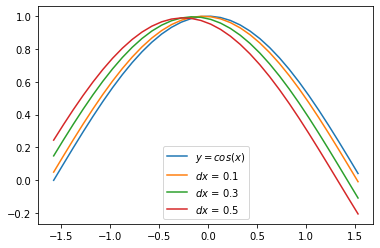

In [58]:
import matplotlib.pyplot as plt 

x = np.arange(-np.pi/2, np.pi/2, 0.1)
y = np.transpose(np.array([closure(x) for closure in closures]))

plt.plot(x, np.cos(x))
plt.plot(x, y)
plt.legend(['$y = cos(x)$','$dx$ = 0.1','$dx$ = 0.3','$dx$ = 0.5'])

# Изобразим в одной графической области графики функций приближений для производной от функции sin(x), а также функцию 
# cos(x)